<a href="https://colab.research.google.com/github/SofiaNikolaeva-adey-201/Project-workshop-on-developing-ETL-solutions/blob/main/pr_3NikolaevaSofiyaGermanovna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Практическая работа 3. Работа с API. Тестовые наборы данных Kaggle API
Практическая работа 3. Работа с API. Тестовые наборы данных Kaggle API

**Задание**

3.1. Спроектировать верхнеуровневую архитектуру аналитического решения в `draw.io`. Необходимо использовать:

- Source Layer - слой источников данных.
- Storage Layer - слой хранения данных.
- Business Layer - слой для доступа к данным бизнес пользователей.

3.2. Получить ключ Kaggle API.

3.3. Настроить среду.

3.4. Провести поиск наборов данных в Kaggle по ключевому слову. Выполнить анализ данных датасета Kuggle, обновленный в `2023-2024` годах.

3.5. Провести анализ датасета на пустые значения. Очистить данные от нулевых и пустых значений. Выбрать только те данные, которые можно в дальнейщем анализировать(числовые характеристики, бинарные и т.д.).

3.6. Получить качественный датасет. Выгрузить его в формате `clear.csv`.

3.7. Реализовать визуализацию полученных метрик в отечественной BI-системе или в аналитических панелях с открытым исходным кодом, например `Apache Superset`.

Результаты практической работы представить в виде файла `ФИО.ipynb`, `clear.csv`.


Дополнительная информация по работе с [Kaggle API](https://github.com/Kaggle/kaggle-api)

1. **Создайте ключ `API` в `Kaggle`**.

Моя учетная запись -> Settings-> API -> Создать новые токены API.

На ваш компьютер будет загружен файл `kaggle.json`. Вы можете загрузить на `Google` Диск вручную или использовать для загрузки приведенный ниже скрипт.

Если вы хотите использовать скрипт для загрузки файла `kaggle.json`, используйте следующий фрагмент в ячейке кода:

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sophie27germ","key":"3243d0e964ef7b7c714e109b2b012217"}'}

Установите `Kaggle API`, используя

In [2]:
!pip install -q kaggle

Переместите файл `kaggle.json` в **~/.kaggle**, где клиент `API` ожидает расположения вашего токена:

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

Предоставьте разрешения на изменение, чтобы избежать предупреждения при запуске инструмента `Kaggle`.

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

Теперь можно получить доступ к наборам данных с помощью клиента

In [5]:
!kaggle datasets list

ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                           Vehicle Sales Data                                  19MB  2024-02-21 20:16:17           5241         88  1.0              
devi5723/e-commerce-cosmetics-dataset                        E-commerce Cosmetic Products                         1MB  2024-02-28 14:46:12            712         24  0.9411765        
sazidthe1/world-gdp-growth                                   World GDP Growth                                    14KB  2024-02-25 11:37:58            834         22  1.0              
tarunrm09/climate-change-indicators                          Climate change Indi

In [6]:
import kaggle

# List of all datasets available on Kaggle
kaggle.api.dataset_list()

[syedanwarafridi/vehicle-sales-data,
 devi5723/e-commerce-cosmetics-dataset,
 sazidthe1/world-gdp-growth,
 tarunrm09/climate-change-indicators,
 kanchana1990/spotifys-long-hits-2014-2024,
 nelgiriyewithana/apple-quality,
 raphaelmanayon/temperature-and-ice-cream-sales,
 mikhail1681/walmart-sales,
 antaesterlin/walmart-commerce-data,
 nelgiriyewithana/emotions,
 kanchana1990/best-buy-2024-windows-laptops,
 xontoloyo/data-penjualan-zara,
 dhavalpatel555/us-stock-market-2020-to-2024,
 tarunrm09/indian-cuisine-based-rda-diet-recommendation-data,
 kapturovalexander/maang-share-prices-till-february-2024,
 harshitstark/covid-19-global-statistics-dataset,
 willianoliveiragibin/drug-overdose-death,
 kapoorprakhar/college-placement-dataset,
 dansbecker/melbourne-housing-snapshot,
 asaniczka/upwork-job-postings-dataset-2024-50k-records]

In [7]:
# поиск наборов данных в Kaggle о ""ключевое слово"""
datasets = kaggle.api.datasets_list(search="FOOD & DRINK")

print(datasets)

[{'subtitleNullable': '1346 Indonesian food and drink nutritional data along with images', 'creatorNameNullable': 'Anas Fikri Hanif', 'creatorUrlNullable': 'anasfikrihanif', 'totalBytesNullable': 75418, 'urlNullable': 'https://www.kaggle.com/datasets/anasfikrihanif/indonesian-food-and-drink-nutrition-dataset', 'licenseNameNullable': 'CC0: Public Domain', 'descriptionNullable': None, 'ownerNameNullable': 'Anas Fikri Hanif', 'ownerRefNullable': 'anasfikrihanif', 'titleNullable': 'Indonesian Food and Drink Nutrition Dataset', 'currentVersionNumberNullable': 1, 'usabilityRatingNullable': 1.0, 'id': 3936204, 'ref': 'anasfikrihanif/indonesian-food-and-drink-nutrition-dataset', 'subtitle': '1346 Indonesian food and drink nutritional data along with images', 'hasSubtitle': True, 'creatorName': 'Anas Fikri Hanif', 'hasCreatorName': True, 'creatorUrl': 'anasfikrihanif', 'hasCreatorUrl': True, 'totalBytes': 75418, 'hasTotalBytes': True, 'url': 'https://www.kaggle.com/datasets/anasfikrihanif/indon

In [8]:
!kaggle datasets list -s "FOOD & DRINK"

ref                                                           title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
anasfikrihanif/indonesian-food-and-drink-nutrition-dataset    Indonesian Food and Drink Nutrition Dataset         74KB  2023-10-31 16:34:34            841         36  1.0              
starbucks/starbucks-menu                                      Nutrition facts for Starbucks Menu                   9KB  2017-07-20 21:49:50          20711        186  0.85294116       
teejmahal20/airline-passenger-satisfaction                    Airline Passenger Satisfaction                       3MB  2020-02-20 16:51:16          71228        794  0.9411765        
fuarresvij/jakarta-food-and-drinks-culinary-business          Jakarta Food 

In [9]:
!pip install pandas
import pandas as pd

In [10]:
datasets = kaggle.api.datasets_list(search="FOOD & DRINK")
df1=pd.DataFrame(datasets)
pd.DataFrame(datasets)

,subtitleNullable,creatorNameNullable,creatorUrlNullable,totalBytesNullable,urlNullable,licenseNameNullable,descriptionNullable,ownerNameNullable,ownerRefNullable,titleNullable,...,topicCount,viewCount,voteCount,currentVersionNumber,hasCurrentVersionNumber,usabilityRating,hasUsabilityRating,tags,files,versions
0,1346 Indonesian food and drink nutritional dat...,Anas Fikri Hanif,anasfikrihanif,75418,https://www.kaggle.com/datasets/anasfikrihanif...,CC0: Public Domain,None,Anas Fikri Hanif,anasfikrihanif,Indonesian Food and Drink Nutrition Dataset,...,0,4400,36,1,True,1.000000,True,"[{'nameNullable': 'nutrition', 'descriptionNul...",[],[]
1,Nutrition information for Starbucks menu items...,Rachael Tatman,rtatman,9656,https://www.kaggle.com/datasets/starbucks/star...,Other (specified in description),None,Starbucks,organizations/starbucks,Nutrition facts for Starbucks Menu,...,0,134440,186,2,True,0.852941,True,"[{'nameNullable': 'nutrition', 'descriptionNul...",[],[]
2,What factors lead to customer satisfaction for...,TJ Klein,teejmahal20,2841945,https://www.kaggle.com/datasets/teejmahal20/ai...,Other (specified in description),None,TJ Klein,teejmahal20,Airline Passenger Satisfaction,...,0,491486,794,1,True,0.941176,True,"[{'nameNullable': 'classification', 'descripti...",[],[]
3,Jakarta Food and Drinks Culinary Business 2014,L. Farras Vijaya,fuarresvij,138078,https://www.kaggle.com/datasets/fuarresvij/jak...,"Database: Open Database, Contents: Database Co...",None,L. Farras Vijaya,fuarresvij,Jakarta Food and Drinks Culinary Business 2014,...,0,2742,21,1,True,0.941176,True,"[{'nameNullable': 'business', 'descriptionNull...",[],[]
4,What contaminant has caused the most hospitali...,Abigail Larion,abigaillarion,214757,https://www.kaggle.com/datasets/cdc/foodborne-...,CC0: Public Domain,None,Centers for Disease Control and Prevention,organizations/cdc,"Foodborne Disease Outbreaks, 1998-2015",...,0,39369,85,1,True,0.823529,True,"[{'nameNullable': 'public health', 'descriptio...",[],[]
5,Identify the type of news based on headlines a...,Rishabh Misra,rmisra,27829769,https://www.kaggle.com/datasets/rmisra/news-ca...,Attribution 4.0 International (CC BY 4.0),None,Rishabh Misra,rmisra,News Category Dataset,...,0,414082,718,3,True,1.000000,True,"[{'nameNullable': 'linguistics', 'descriptionN...",[],[]
6,reviews product on marketplace Tokopedia label...,Moh. Fahrul Hafidh,kulitekno,299636,https://www.kaggle.com/datasets/kulitekno/toko...,Attribution-NonCommercial 4.0 International (C...,None,Moh. Fahrul Hafidh,kulitekno,Tokopedia Product Reviews Category Food and Drink,...,0,5196,15,1,True,0.647059,True,"[{'nameNullable': 'nlp', 'descriptionNullable'...",[],[]
7,Looking for your next ski destination in Europe?,thomasnibb,thomasnibb,15422,https://www.kaggle.com/datasets/thomasnibb/eur...,Other (specified in description),None,thomasnibb,thomasnibb,European Ski Resorts,...,0,12105,40,1,True,1.000000,True,"[{'nameNullable': 'europe', 'descriptionNullab...",[],[]
8,US Airline Passenger Satisfaction,John D,johndddddd,24600449,https://www.kaggle.com/datasets/johndddddd/cus...,Unknown,None,John D,johndddddd,Passenger Satisfaction,...,0,65957,103,2,True,0.529412,True,"[{'nameNullable': 'transportation', 'descripti...",[],[]
9,Customer satisfaction with various other factors,Sayantan Jana,sjleshrac,1724667,https://www.kaggle.com/datasets/sjleshrac/airl...,CC0: Public Domain,None,Sayantan Jana,sjleshrac,Airlines Customer satisfaction,...,0,105972,159,1,True,0.941176,True,"[{'nameNullable': 'business', 'descriptionNull...",[],[]


In [12]:
df1.to_excel("FOOD & DRINK.xlsx", sheet_name='FOOD & DRINK')

In [13]:
from google.colab import files
files.download('FOOD & DRINK.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Изучим датасет **based on eating habits and physical condition in individuals **


Download Dataset.

In [14]:
!kaggle datasets download -d jayitabhattacharyya/estimation-of-obesity-levels-uci-dataset

  0% 0.00/115k [00:00<?, ?B/s]
100% 115k/115k [00:00<00:00, 57.4MB/s]


In [15]:
import zipfile

with zipfile.ZipFile("estimation-of-obesity-levels-uci-dataset.zip","r") as zip_ref:

    # extracting content in the zipfile
    zip_ref.extractall()



In [16]:
!ls

 estimation-of-obesity-levels-uci-dataset.zip   ObesityDataSet_raw_and_data_sinthetic.arff
'FOOD & DRINK.xlsx'			        ObesityDataSet_raw_and_data_sinthetic.csv
 kaggle.json				        sample_data


In [18]:
# reading the contents
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# printing first 100 raws of the dataframe
df.head(100)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Male,26.0,1.70,70.0,yes,no,3.0,1.0,Frequently,no,2.0,no,2.0,0.0,Frequently,Public_Transportation,Normal_Weight
96,Female,23.0,1.66,60.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
97,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight


1. Gender - пол участника исследования (мужской или женский)
2. Age - возраст участника исследования
3. Height - рост участника исследования
4. Weight - вес участника исследования
5. family_history_with_overweight - наличие у участника семейной истории с ожирением
6. FAVC - частота употребления фруктов
7. FCVC - частота употребления овощей
8. NCP - количество приемов пищи в день
9. CAEC - потребление еды вне дома
10. SMOKE - наличие участника курения
11. CH2O - потребление воды в день
12. SCC - потребление количества калорий
13. FAF - уровень физической активности
14. TUE - время, проведенное за компьютером
15. CALC - потребление алкоголя
16. MTRANS - способ транспортировки
17. NObeyesdad - наличие ожирения (категория по индексу массы тела)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [21]:
my_df =df[['Gender','Age','Height','Weight','family_history_with_overweight','SMOKE','NObeyesdad']].copy()

In [22]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   SMOKE                           2111 non-null   object 
 6   NObeyesdad                      2111 non-null   object 
dtypes: float64(3), object(4)
memory usage: 115.6+ KB


In [23]:
my_df

,Gender,Age,Height,Weight,family_history_with_overweight,SMOKE,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,yes,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,Overweight_Level_II
...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,no,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,no,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,no,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,no,Obesity_Type_III


In [24]:
my_df.isnull().values.any()

False

In [25]:
my_df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
SMOKE                             0
NObeyesdad                        0
dtype: int64

In [26]:
df.isnull().sum().sum()

0

In [27]:
my_df.isna().sum()/(len(df))*100

Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
SMOKE                             0.0
NObeyesdad                        0.0
dtype: float64

In [28]:
my_df.isnull().sum()/(len(df))*100

Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
SMOKE                             0.0
NObeyesdad                        0.0
dtype: float64

In [32]:
df2 = my_df.dropna()

In [33]:
df2

,Gender,Age,Height,Weight,family_history_with_overweight,SMOKE,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,yes,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,Overweight_Level_II
...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,no,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,no,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,no,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,no,Obesity_Type_III


In [34]:
df2.isnull().values.any()

False

In [35]:
df2.to_csv("clear.csv")

In [36]:
from google.colab import files
files.download('clear.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Датасет в Даталенс: https://datalens.yandex/uw30rwjuuq6si

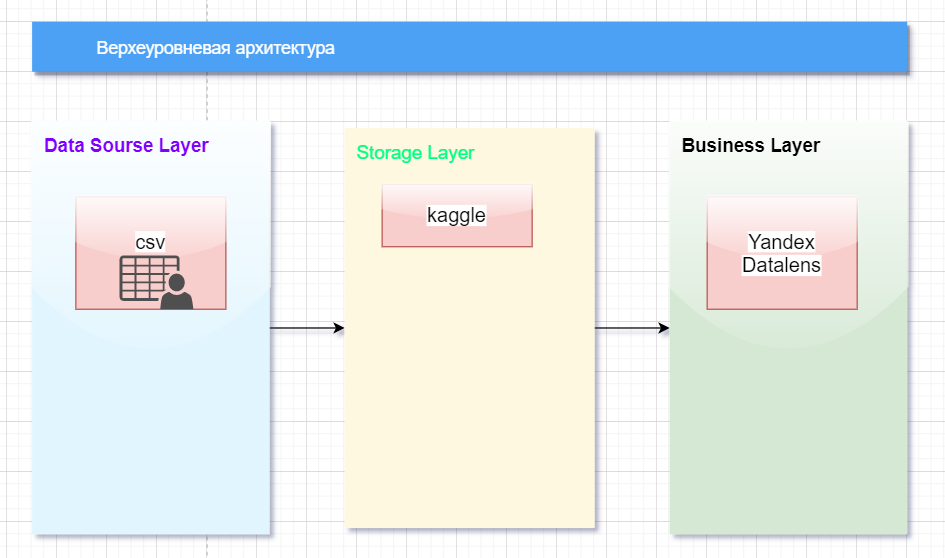

# Самостоятельная работа


3.1. Спроектировать верхнеуровневую архитектуру аналитического решения в `draw.io`. Необходимо использовать:

- Source Layer - слой источников данных.
- Storage Layer - слой хранения данных.
- Business Layer - слой для доступа к данным бизнес пользователей.

3.2. Получить ключ Kaggle API.

3.3. Настроить среду.

3.4. Провести поиск наборов данных в Kaggle по ключевому слову. Выполнить анализ данных датасета Kuggle, обновленный в `2023-2024` годах.

3.5. Провести анализ датасета на пустые значения. Очистить данные от нулевых и пустых значений. Выбрать только те данные, которые можно в дальнейщем анализировать(числовые характеристики, бинарные и т.д.).

3.6. Получить качественный датасет. Выгрузить его в формате `clear.csv`.

3.7. Реализовать визуализацию полученных метрик в отечественной BI-системе или в аналитических панелях с открытым исходным кодом, например `Apache Superset`.

Результаты практической работы представить в виде файла `ФИО.ipynb`, `clear.csv`.

**Вариант**.

`1-11` поиск ведем по ключевым словам,

вариант `12-35` - по названию Датасета.

`Ключевые слова`:

1. ENTERTAINMENT.
2. TRAVEL.
3. STYLE & BEAUTY.
4. PARENTING.
5. HEALTHY LIVING.
6. FOOD & DRINK.
7. BUSINESS.
8. COMEDY.
9. SPORTS.
10. HOME & LIVING.
11. PARENTS.

`ДАТАСЕТ`:

12. Credit Card Fraud Detection.
13. European Soccer Database.
14. Avocado Prices.
15. IBM HR Analytics Employee Attrition & Performance.
16. Medical Cost Personal Datasets.
17. Open Food Facts.
18. Machine Learning & Data Science Survey.
19. Survival Rate of Russian Companies.
20. Yandex: Geo Reviews Dataset 2023.
21. Yandex Music TOP 100 songs.
22. HeadHunter vacancies.
23. Russian Marketplace Reviews E-Commerce Dataset.
24. world economic.
25. credit card transicts.